In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('crimedataexp.csv')

Saving crimedataexp.csv to crimedataexp.csv


In [ ]:

print(df.columns)


Index(['Report Number', 'Date Reported', 'Time Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed',
       'Time Case Closed'],
      dtype='object')


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Time Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Time Case Closed
0,1,02-01-2020,0.0,01-01-2020,1.11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,NaN
1,2,01-01-2020,19.0,01-01-2020,6.26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,NaN
2,3,02-01-2020,5.0,01-01-2020,14.30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,NaN
3,4,01-01-2020,5.0,01-01-2020,14.46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020,5.0
4,5,01-01-2020,21.0,01-01-2020,16.51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020,21.0


In [ ]:
# Function to convert hour.second to hh:mm:ss
def convert_time_to_timedelta(time_str):
    if pd.isna(time_str) or time_str == '':
        return pd.NaT  # Return NaT for missing values
    # Split hour and minute
    try:
        hour, minute = map(int, time_str.split('.'))
        return pd.to_timedelta(f"{hour}:{minute}:00")  # Create timedelta
    except ValueError:
        return pd.NaT  # Return NaT if there's an error in conversion

# Convert time columns to timedelta format
df['Time Reported'] = df['Time Reported'].astype(str).apply(convert_time_to_timedelta)
df['Time of Occurrence'] = df['Time of Occurrence'].astype(str).apply(convert_time_to_timedelta)
df['Time Case Closed'] = df['Time Case Closed'].astype(str).apply(lambda x: convert_time_to_timedelta(x) if x != 'nan' else pd.NaT)

print(df[['Time Reported', 'Time of Occurrence', 'Time Case Closed']].head())

    Time Reported Time of Occurrence Time Case Closed
0 0 days 00:00:00    0 days 01:11:00              NaT
1 0 days 19:00:00    0 days 06:26:00              NaT
2 0 days 05:00:00    0 days 14:03:00              NaT
3 0 days 05:00:00    0 days 14:46:00  0 days 05:00:00
4 0 days 21:00:00    0 days 16:51:00  0 days 21:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Try converting with automatic inference, handling errors by setting invalid dates to NaT
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce', dayfirst=True)

# Drop rows with NaT in 'Date of Occurrence' if necessary
df = df.dropna(subset=['Date of Occurrence'])

# Extract the year
df['Year'] = df['Date of Occurrence'].dt.year

# Group by Year and Victim Gender, and fill missing values with 0
victim_gender_yearly = df.groupby(['Year', 'Victim Gender']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

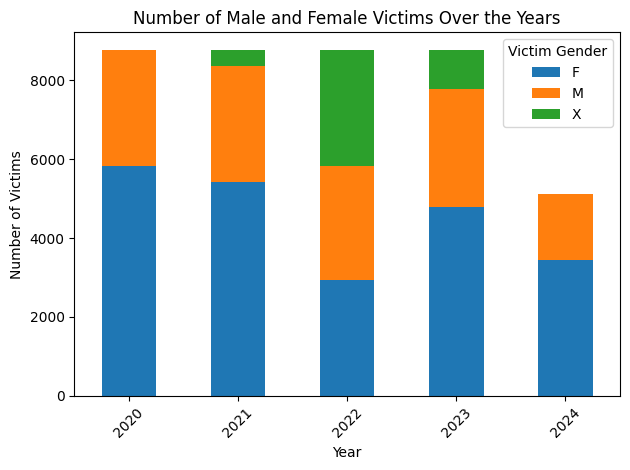

In [ ]:
plt.figure(figsize=(12, 6))

# bar plot
victim_gender_yearly.plot(kind='bar', stacked=True)

plt.title('Number of Male and Female Victims Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.legend(title='Victim Gender')
plt.tight_layout()

plt.show()

In [ ]:
# Group by 'Year' to get yearly crime counts
yearly_crime_counts = df.groupby('Year').size()
print(yearly_crime_counts)


Year
2020    8769
2021    8761
2022    8765
2023    8758
2024    5107
dtype: int64


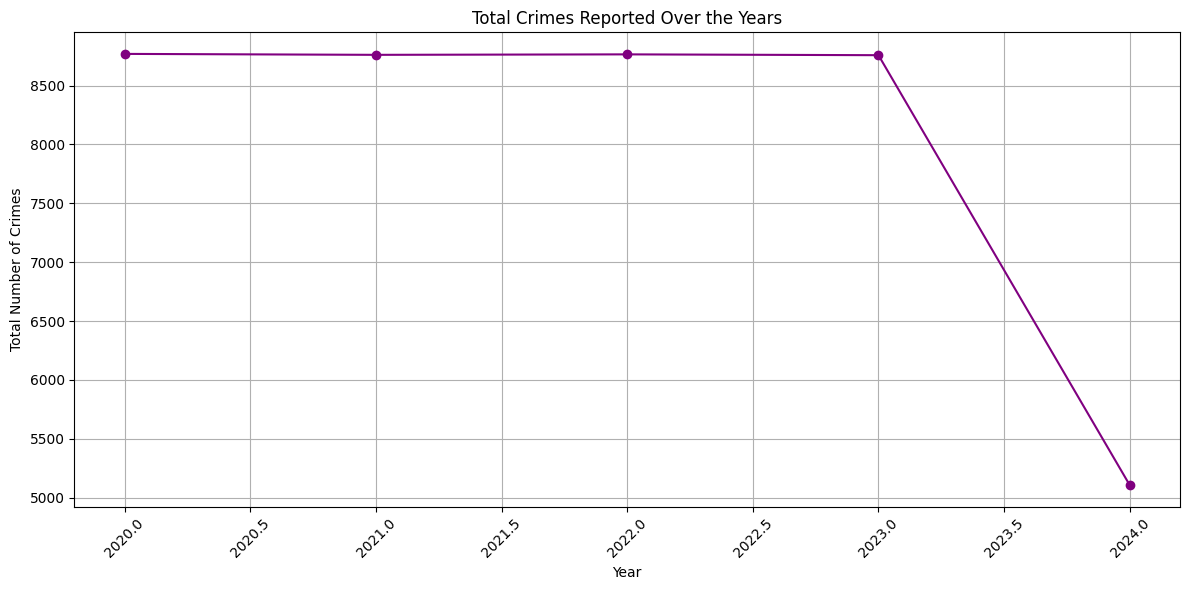

In [ ]:
# Count total crimes per year
total_crimes_yearly = df.groupby('Year').size()

# Plot total crimes over the years
plt.figure(figsize=(12, 6))
total_crimes_yearly.plot(kind='line', marker='o', color='purple')
plt.title('Total Crimes Reported Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



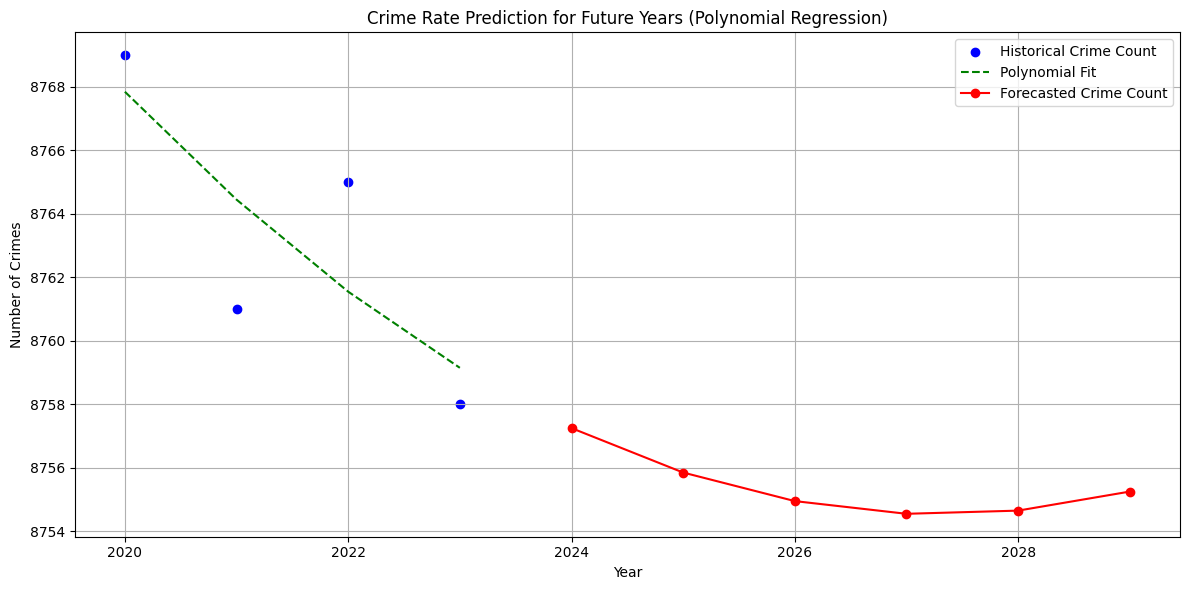

Predicted crime count for 2024: 8757
Predicted crime count for 2025: 8756
Predicted crime count for 2026: 8755
Predicted crime count for 2027: 8755
Predicted crime count for 2028: 8755
Predicted crime count for 2029: 8755


In [ ]:
# Assuming total_crimes_yearly is already defined
# Filter the data to include only years from 2020 to 2023
historical_data = total_crimes_yearly.loc[total_crimes_yearly.index.isin([2020, 2021, 2022, 2023])]

# Prepare the data for polynomial regression
X = historical_data.index.values.reshape(-1, 1)  # Year as independent variable
y = historical_data.values  # Total crimes as dependent variable

# Create polynomial features
degree = 2  # You can adjust the degree based on your needs
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions for 2024 to 2029
future_years = np.array([2024, 2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot historical and future predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Historical Crime Count", color='blue')
plt.plot(X, model.predict(X_poly), color='green', label="Polynomial Fit", linestyle='--')
plt.plot(future_years, future_predictions, color='red', label="Forecasted Crime Count", marker='o')
plt.title("Crime Rate Prediction for Future Years (Polynomial Regression)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Display future predictions
for year, count in zip(future_years.flatten(), future_predictions):
    print(f"Predicted crime count for {year}: {count:.0f}")


In [ ]:
# Function to classify crime severity
def classify_severity(description):
    severe_crimes = ["HOMICIDE", "KIDNAPPING", "SEXUAL ASSAULT", "ROBBERY", "EXTORTION"]
    moderate_crimes = ["ASSAULT", "BURGLARY", "DRUG OFFENSE", "VEHICLE - STOLEN", "FRAUD", "ARSON", "FIREARM OFFENSE"]
    minor_crimes = ["VANDALISM", "IDENTITY THEFT", "COUNTERFEITING", "SHOPLIFTING", "PUBLIC INTOXICATION", "TRAFFIC VIOLATION", "CYBERCRIME", "ILLEGAL POSSESSION"]

    description = description.strip().upper()  # Normalize the description
    if description in severe_crimes:
        return "Severe"
    elif description in moderate_crimes:
        return "Moderate"
    elif description in minor_crimes:
        return "Minor"
    else:
        return "Unknown"

# Apply the function to create a new severity_label column
df['severity_label'] = df['crime_description'].apply(classify_severity)

# Display the DataFrame with severity labels
print(df)

       crime_description severity_label
0         IDENTITY THEFT          Minor
1               HOMICIDE         Severe
2             KIDNAPPING         Severe
3               BURGLARY       Moderate
4              VANDALISM          Minor
..                   ...            ...
97        SEXUAL ASSAULT         Severe
98        IDENTITY THEFT          Minor
99          DRUG OFFENSE       Moderate
100  PUBLIC INTOXICATION          Minor
101            EXTORTION         Severe

[102 rows x 2 columns]


   Victim Gender  Crime Description  count
0              F              ARSON   1051
1              F            ASSAULT   1082
2              F           BURGLARY   1094
3              F     COUNTERFEITING   1021
4              F         CYBERCRIME   1052
..           ...                ...    ...
58             X     SEXUAL ASSAULT    232
59             X        SHOPLIFTING    192
60             X  TRAFFIC VIOLATION    210
61             X          VANDALISM    176
62             X   VEHICLE - STOLEN    213

[63 rows x 3 columns]


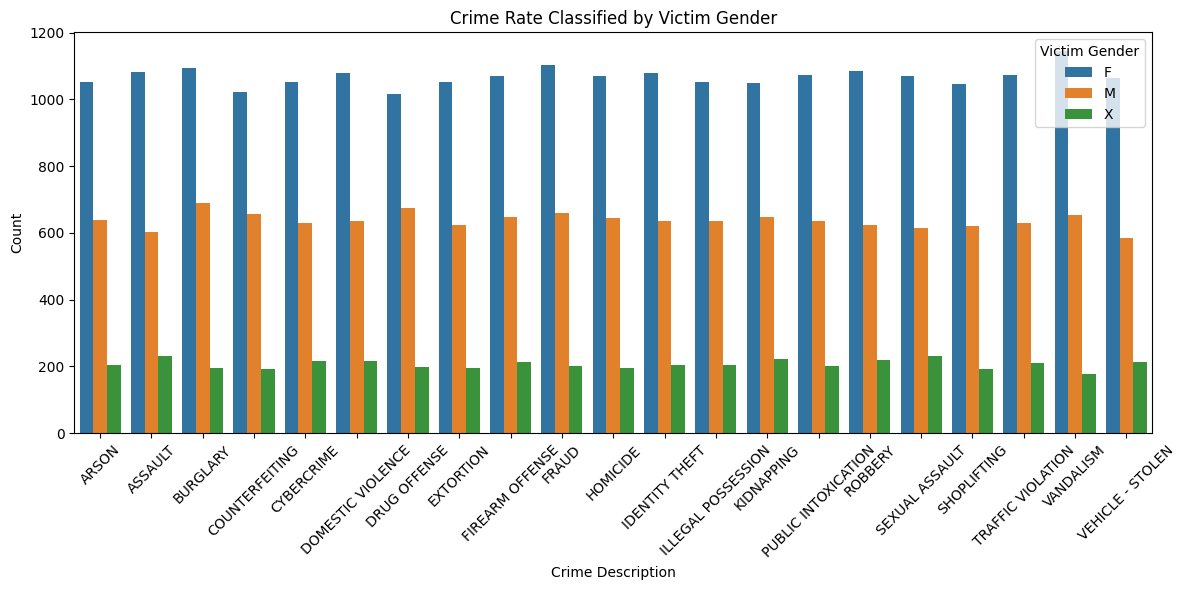

In [ ]:
required_columns = ['Crime Description', 'Victim Gender']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise ValueError(f"The following required columns are missing: {', '.join(missing_columns)}.")

# Count occurrences of crimes grouped by victim gender
crime_rate = df.groupby(['Victim Gender', 'Crime Description']).size().reset_index(name='count')

# Display the grouped data
print(crime_rate)

# Visualize the crime rates classified by gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Crime Description', y='count', hue='Victim Gender', data=crime_rate)
plt.title('Crime Rate Classified by Victim Gender')
plt.xlabel('Crime Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Victim Gender')
plt.tight_layout()
plt.show()

In [ ]:
unique_cities = df['City'].unique()

# Convert to a list for easier readability
unique_cities_list = unique_cities.tolist()

# Display the unique cities
print("Unique cities in the dataset:")
print(unique_cities_list)

Unique cities in the dataset:
['Chennai', 'Ludhiana', 'Pune', 'Delhi', 'Mumbai', 'Surat', 'Visakhapatnam', 'Bangalore', 'Kolkata', 'Ghaziabad', 'Hyderabad', 'Lucknow', 'Bhopal', 'Patna', 'Kanpur', 'Varanasi', 'Meerut', 'Thane', 'Indore', 'Rajkot', 'Vasai', 'Agra', 'Kalyan', 'Nashik', 'Srinagar', 'Faridabad']


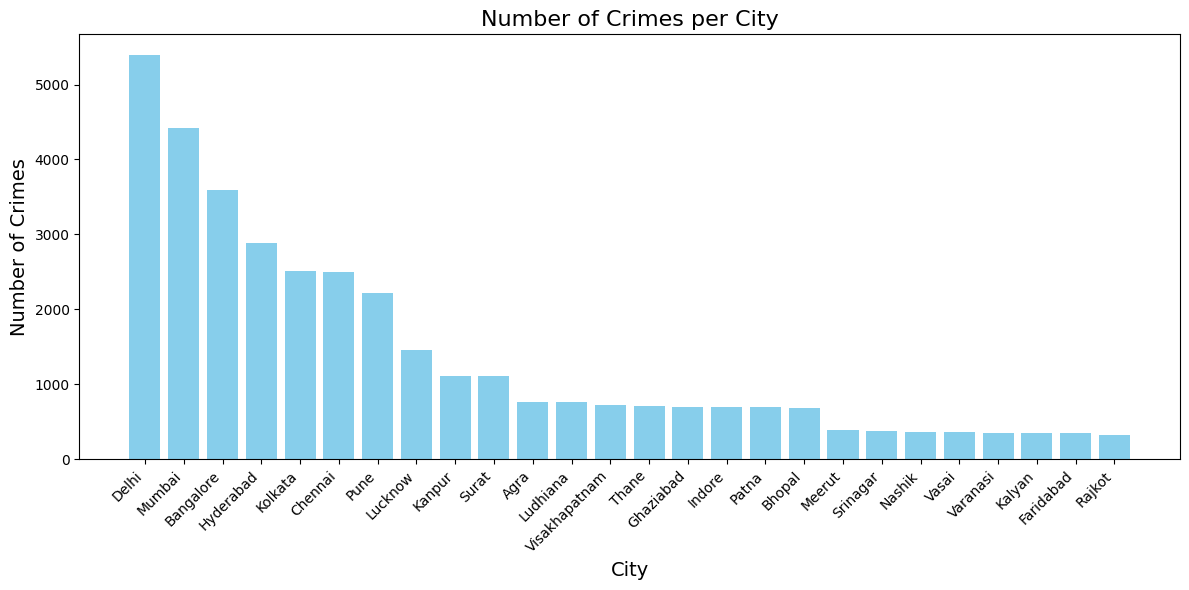

In [ ]:
# Group by 'City' and count the number of crimes
crimes_per_city = df['City'].value_counts().reset_index()
crimes_per_city.columns = ['City', 'Number of Crimes']

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(crimes_per_city['City'], crimes_per_city['Number of Crimes'], color='skyblue')
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.title('Number of Crimes per City', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Mean Squared Error: 2609163.024351155


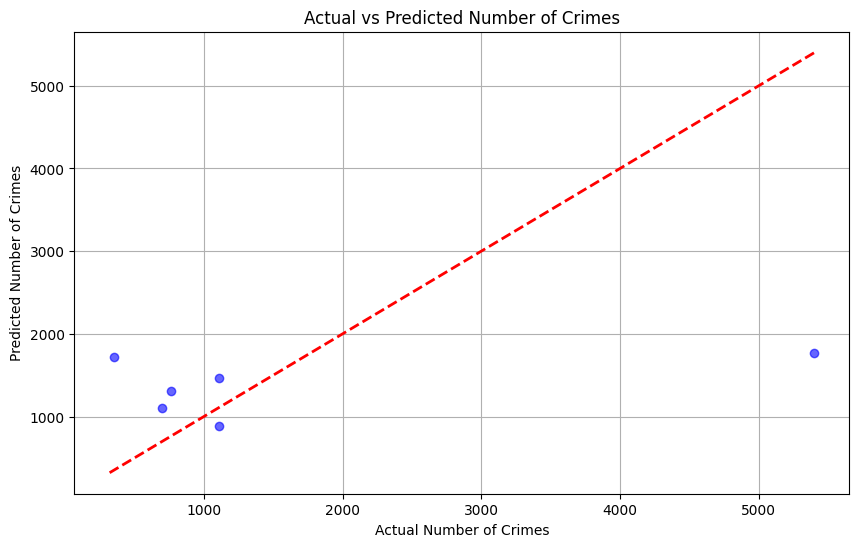

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with crime data already loaded

# Group by 'City' and count the number of crimes
crime_counts = df['City'].value_counts().reset_index()
crime_counts.columns = ['City', 'Number of Crimes']

# Encode city names to numerical values
label_encoder = LabelEncoder()
crime_counts['City'] = label_encoder.fit_transform(crime_counts['City'])

# Define features and target variable
X = crime_counts[['City']]  # Features
y = crime_counts['Number of Crimes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Line for perfect predictions
plt.title('Actual vs Predicted Number of Crimes')
plt.xlabel('Actual Number of Crimes')
plt.ylabel('Predicted Number of Crimes')
plt.grid(True)
plt.show()


Confusion Matrix:
[[ 92  45  18  38  18  11   6  32   5   3   0   7   0   5   4  29   1  20
    0   0  13]
 [ 95  48  19  30  17  10   9  35   9   4   0   8   0   4   2  14   1  14
    0   0  13]
 [ 93  63  18  36  21   8  17  35  12   2   1   5   0   6   1  22   3  19
    0   0  10]
 [ 88  61  14  30  19   8  18  35   7   0   0   3   1   2   1  26   0  20
    0   0   8]
 [ 99  69  17  27  13   3  12  22   8   2   0   3   1   6   4  27   0  16
    0   0   7]
 [ 96  60  17  25  20   6  18  33   8   2   2   6   1   5   4  14   2  24
    0   0  13]
 [ 91  60  21  31  18   7  21  32   2   2   3   3   1   3   3  19   0  17
    0   0  10]
 [ 80  60  19  36  14   6   9  29   8   3   1   4   1   3   1  19   0  12
    0   0  12]
 [ 99  67  26  29  17   5  16  32   5   7   1   1   0   6   2  23   2  24
    0   0  12]
 [102  73  17  33   8   3  11  25   5   3   0   8   1   3   4  18   2  27
    0   0   7]
 [ 95  60  19  30  15   6  13  20   4   1   0   6   1   2   6  27   2  21
    0   0  10]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


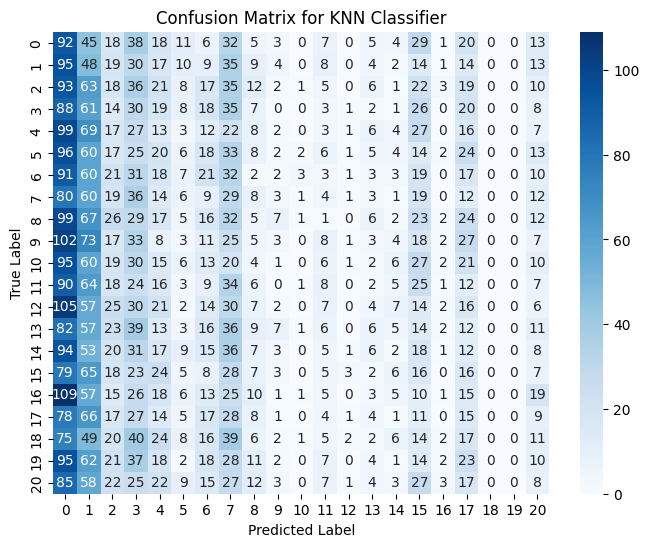

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Load your data
# df = pd.read_csv('path_to_your_data.csv')  # Uncomment and specify your file path

# Check required columns
required_columns = ['Crime Description', 'City', 'Victim Gender']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise ValueError(f"The following required columns are missing: {', '.join(missing_columns)}.")

# Encode categorical variables
label_encoder = LabelEncoder()
df['Crime Description'] = label_encoder.fit_transform(df['Crime Description'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Victim Gender'] = label_encoder.fit_transform(df['Victim Gender'])

# Define features and target variable
X = df[['City', 'Victim Gender']]  # Features
y = df['Crime Description']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

